In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [41]:
image = cv.imread('../data/4_2.jpg')
# image = cv.resize(image, (745, 1024))

In [42]:
image.shape

(3501, 2550, 3)

In [27]:
cv.imshow('image', image)
cv.waitKey(500000)
cv.destroyAllWindows()

In [43]:


hsi_image = cv.cvtColor(image, cv.COLOR_BGR2HSV_FULL)
saturation_component = hsi_image[:, :, 1]
_, thresholdImage = cv.threshold(saturation_component, 30, 255, cv.THRESH_BINARY)

grayImage = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
grayImage = 255 - grayImage
_, thresholdImage = cv.threshold(grayImage, 50, 255, cv.THRESH_BINARY)

copyImage = image.copy()
numLabels, labels, stats, centroids = cv.connectedComponentsWithStats(thresholdImage, connectivity=8)

contours, _ = cv.findContours(thresholdImage, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(copyImage, contours, -1, (255), thickness=cv.FILLED)



# for i in range(1, numLabels): 
#     x, y, w, h, area = stats[i]
#     if(w*h>5 and w*h<4000):
#         cv.rectangle(copyImage, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv.imshow('image', image)
cv.imshow('grayImage', grayImage)
cv.imshow('saturation_component', saturation_component)
cv.imshow('copyImage', copyImage)
cv.imshow('thresholdImage',thresholdImage)
cv.waitKey(0)
cv.destroyAllWindows()

In [44]:
len(contours)

324

In [45]:
for i, contour in enumerate(contours):
    x, y, w, h = cv.boundingRect(contour)
    if w*h <10:
        continue
    # Crop the region of interest from the original image
    roi = image[y:y+h, x:x+w]
    
    # Create a transparent image of the same size as the contour
    transparent_img = np.zeros((h, w, 4), dtype=np.uint8)
    
    # Create a mask image with the contour filled with white color (255)
    mask = np.zeros((h, w), dtype=np.uint8)
    cv.drawContours(mask, [contour - (x, y)], 0, (255), -1)
    
    # Copy the cropped region of interest to the transparent image where the mask is white
    transparent_img[:, :, :3] = roi
    transparent_img[:, :, 3] = mask

    cv.imwrite(f"../data/objects/wheat/contour_{i+3600}.png", transparent_img)

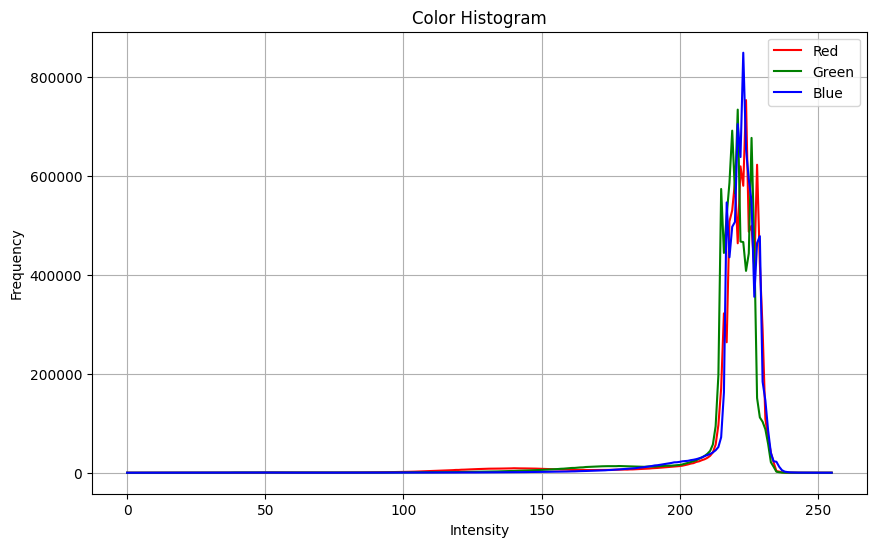

In [125]:
histogram_r = cv.calcHist([image], [0], None, [256], [0, 256])
histogram_g = cv.calcHist([image], [1], None, [256], [0, 256])
histogram_b = cv.calcHist([image], [2], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(10, 6))
plt.title('Color Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.plot(histogram_r, color='red', label='Red')
plt.plot(histogram_g, color='green', label='Green')
plt.plot(histogram_b, color='blue', label='Blue')
plt.legend()
plt.grid()
plt.show()